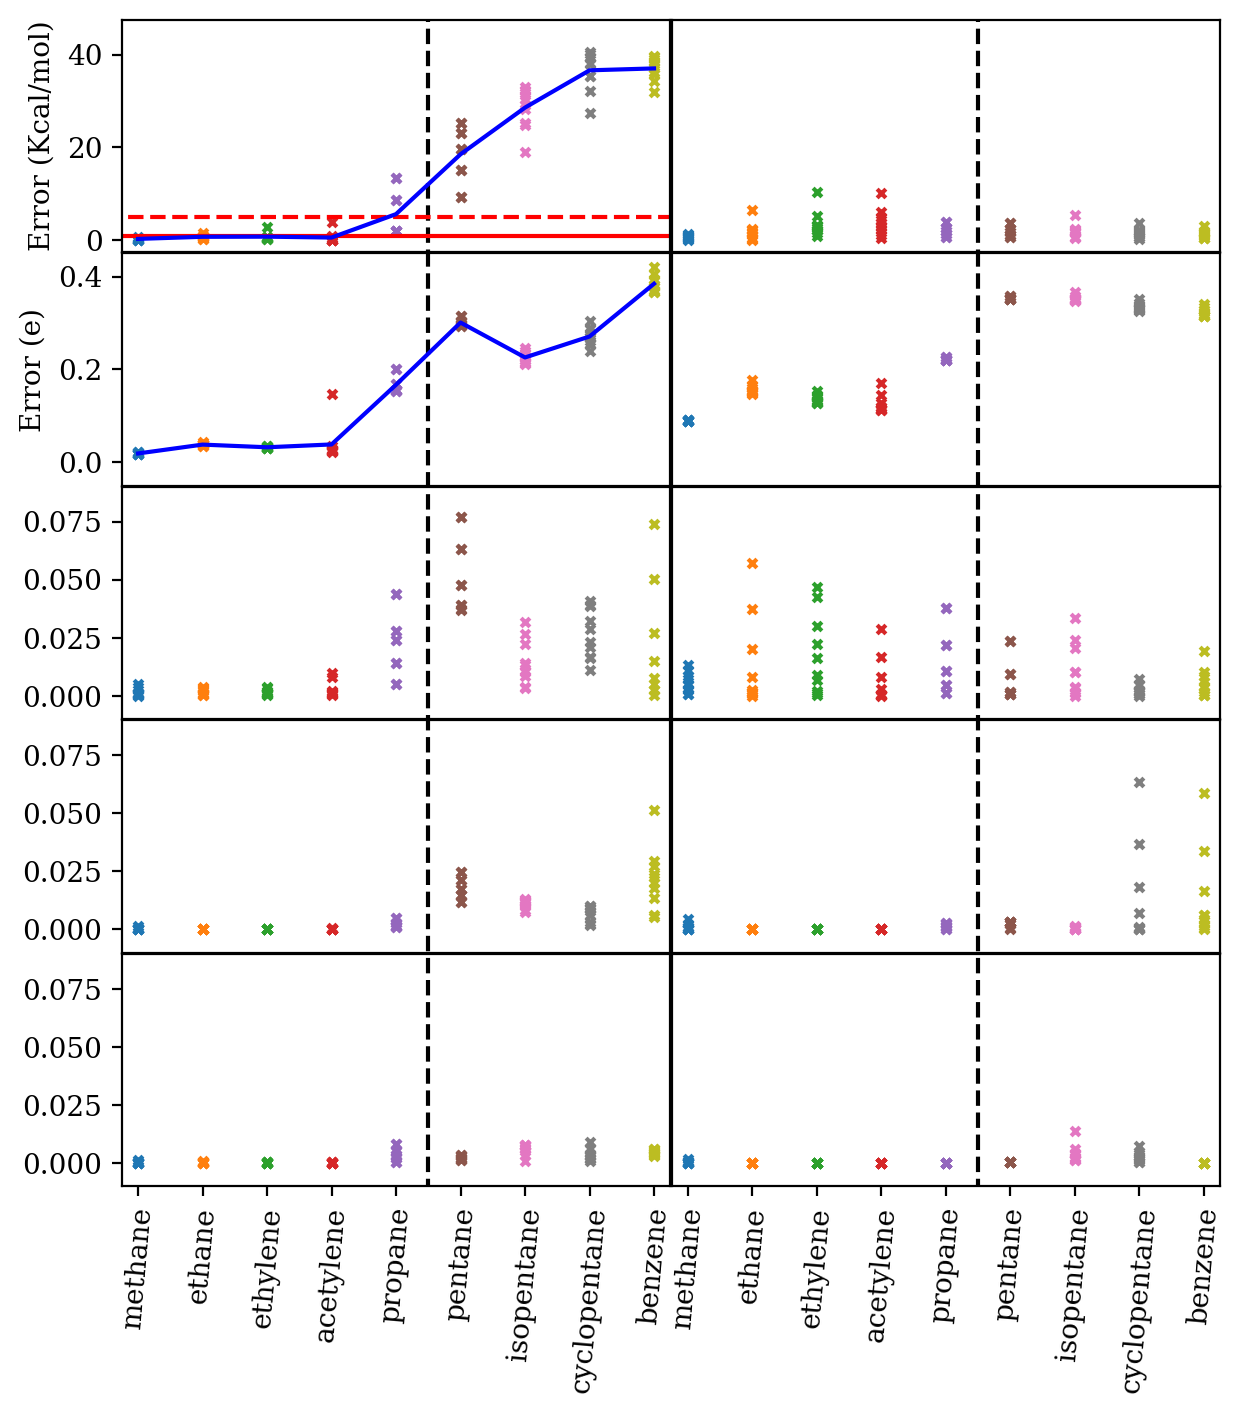

In [2]:
from pathlib import Path
import datetime

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

TRAIN_STR_DICT = [
    "methane",
    "ethane",
    "ethylene",
    "acetylene",
    "propane",
]
EVAL_STR_DICT = [
    "pentane",
    "isopentane",
    "cyclopentane",
    "benzene",
]
from matplotlib import rcParams
from matplotlib import rc


rc("font", **{"family": "sans-serif", "sans-serif": ["Helvetica"]})
# rc("text", usetex=True)
rc("font", family="serif")

# rcParams["text.latex.preamble"] = thesis_latex

fontsize = 10.045
sca_size = 2
plt.rc("font", size=fontsize)  # controls default text size
plt.rc("axes", titlesize=fontsize)  # fontsize of the title
plt.rc("axes", labelsize=fontsize)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=fontsize)  # fontsize of the x tick labels
plt.rc("ytick", labelsize=fontsize)  # fontsize of the y tick labels
plt.rc("legend", fontsize=fontsize)  # fontsize of the legend

plt.rcParams["figure.figsize"] = np.array([0.95, 0.95]) * 520 / 72

f, axes = plt.subplots(5, 2)
axes = axes.reshape(5, 2)

begin_y = 0.075
end_y = 0.925
int_y = 0.001
begin_x = 0.125
end_x = 0.925
int_x = 0.001
end_x += int_x
end_y += int_y

shapexy = np.shape(axes)
inter_x = np.linspace(begin_x, end_x, shapexy[1] + 1)
inter_y = np.linspace(begin_y, end_y, shapexy[0] + 1)

delta_x = inter_x[1] - inter_x[0] - int_x
delta_y = inter_y[1] - inter_y[0] - int_y

for i in range(shapexy[0]):
    for j in range(shapexy[1]):
        axes[i][j].set_position(
            [
                inter_x[j],
                inter_y[i],
                inter_x[j + 1] - inter_x[j] - int_x,
                inter_y[i + 1] - inter_y[i] - int_y,
            ]
        )

axes = axes[::-1, :]

# model_number = "2024-05-31-11-36-26-200"
# model_number = "ccdft-2024-06-27-23-52-21-64-4-0"
# model_number = "ccdft-2024-06-26-00-16-07-64-4-0"
model_number = "ccdft-2024-06-27-23-50-28-64-4-0"

load_name = f"../validate/{model_number}"
load_path = Path(f"{load_name}")

data = pd.read_csv(load_path)

loss_scf_ene_l, loss_dft_ene_l, loss_scf_rho_l, loss_dft_rho_l = [], [], [], []
loss_scf_dipole_x_l, loss_dft_dipole_x_l = [], []
loss_scf_dipole_y_l, loss_dft_dipole_y_l = [], []
loss_scf_dipole_z_l, loss_dft_dipole_z_l = [], []
number_draw = 0

for dict_ in [TRAIN_STR_DICT, EVAL_STR_DICT]:
    for i_name in dict_:
        data_tmp = data.loc[data["name"].str.match(i_name)]
        data_eq = data_tmp.loc[data_tmp["name"].str.contains(f"0_1_0.0000")]

        data_loss_scf_ene = np.abs(data_tmp["error_scf_ene"])
        data_loss_dft_ene = data_tmp["error_dft_ene"] - np.mean(
            data_tmp["error_dft_ene"]
        )
        data_loss_dft_ene = np.abs(data_loss_dft_ene)

        data_loss_scf_rho = np.abs(data_tmp["error_scf_rho_r"])
        data_loss_dft_rho = np.abs(data_tmp["error_dft_rho_r"])

        data_loss_scf_dipole_x = np.abs(data_tmp["dipole_x_diff_scf"])
        data_loss_dft_dipole_x = np.abs(data_tmp["dipole_x_diff_dft"])
        data_loss_scf_dipole_y = np.abs(data_tmp["dipole_y_diff_scf"])
        data_loss_dft_dipole_y = np.abs(data_tmp["dipole_y_diff_dft"])
        data_loss_scf_dipole_z = np.abs(data_tmp["dipole_z_diff_scf"])
        data_loss_dft_dipole_z = np.abs(data_tmp["dipole_z_diff_dft"])

        loss_scf_ene_l.append(data_loss_scf_ene.mean())
        loss_dft_ene_l.append(data_loss_dft_ene.mean())
        loss_scf_rho_l.append(data_loss_scf_rho.mean())
        loss_dft_rho_l.append(data_loss_dft_rho.mean())
        loss_scf_dipole_x_l.append(data_loss_scf_dipole_x.mean())
        loss_dft_dipole_x_l.append(data_loss_dft_dipole_x.mean())
        loss_scf_dipole_y_l.append(data_loss_scf_dipole_y.mean())
        loss_dft_dipole_y_l.append(data_loss_dft_dipole_y.mean())
        loss_scf_dipole_z_l.append(data_loss_scf_dipole_z.mean())
        loss_dft_dipole_z_l.append(data_loss_dft_dipole_z.mean())

        name_list = data_tmp["name"].values
        for i in range(len(name_list)):
            name_list[i] = float(name_list[i].split("_")[-1])

        axes[0, 0].scatter(
            np.zeros_like(data_loss_scf_ene) + number_draw,
            data_loss_scf_ene,
            s=10,
            marker="x",
        )
        axes[1, 0].scatter(
            np.zeros_like(data_loss_scf_rho) + number_draw,
            data_loss_scf_rho,
            s=10,
            marker="x",
        )
        axes[2, 0].scatter(
            np.zeros_like(data_loss_scf_dipole_x) + number_draw,
            data_loss_scf_dipole_x,
            s=10,
            marker="x",
        )
        axes[3, 0].scatter(
            np.zeros_like(data_loss_scf_dipole_y) + number_draw,
            data_loss_scf_dipole_y,
            s=10,
            marker="x",
        )
        axes[4, 0].scatter(
            np.zeros_like(data_loss_scf_dipole_z) + number_draw,
            data_loss_scf_dipole_z,
            s=10,
            marker="x",
        )

        axes[0, 1].scatter(
            np.zeros_like(data_loss_dft_ene) + number_draw,
            data_loss_dft_ene,
            s=10,
            marker="x",
        )
        axes[1, 1].scatter(
            np.zeros_like(data_loss_dft_rho) + number_draw,
            data_loss_dft_rho,
            s=10,
            marker="x",
        )
        axes[2, 1].scatter(
            np.zeros_like(data_loss_dft_dipole_x) + number_draw,
            data_loss_dft_dipole_x,
            s=10,
            marker="x",
        )
        axes[3, 1].scatter(
            np.zeros_like(data_loss_dft_dipole_y) + number_draw,
            data_loss_dft_dipole_y,
            s=10,
            marker="x",
        )
        axes[4, 1].scatter(
            np.zeros_like(data_loss_dft_dipole_z) + number_draw,
            data_loss_dft_dipole_z,
            s=10,
            marker="x",
        )
        number_draw += 1

    for i_row in range(axes.shape[0]):
        for i_col in range(axes.shape[1]):
            axes[i_row, i_col].vlines(
                number_draw - 0.5, -10, 100, colors="k", linestyles="--"
            )

axes[0, 0].hlines(1, -0.5, 100 - 0.5, "r")
axes[0, 0].hlines(5, -0.5, 100 - 0.5, "r", linestyle="--")
axes[0, 0].plot(range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)), loss_scf_ene_l, "b")
axes[1, 0].plot(range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)), loss_scf_rho_l, "b")

for i_row in range(axes.shape[0]):
    for i_col in range(axes.shape[1]):
        axes[i_row, i_col].set_xticks([])
        axes[i_row, -1].set_yticks([])
        axes[-1, i_col].set_xticks(
            range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)),
            TRAIN_STR_DICT + EVAL_STR_DICT,
            rotation=85,
        )
        axes[i_row, i_col].set_xlim(
            -0.25, len(TRAIN_STR_DICT) + len(EVAL_STR_DICT) - 0.75
        )
        axes[i_row, i_col].set_xlim(
            -0.25, len(TRAIN_STR_DICT) + len(EVAL_STR_DICT) - 0.75
        )

axes[0, 0].set_ylabel("Error (Kcal/mol)")
axes[1, 0].set_ylabel("Error (e)")
for i_col in range(2):
    axes[0, i_col].set_ylim(-2.5, 47.5)
    axes[1, i_col].set_ylim(-0.05, 0.45)
    axes[2, i_col].set_ylim(-0.01, 0.09)
    axes[3, i_col].set_ylim(-0.01, 0.09)
    axes[4, i_col].set_ylim(-0.01, 0.09)
# axes[0, 1].set_ylim(-15, 150)
# axes[0, 1].set_ylabel("Error (mHa)")
# axes[1, 1].set_ylim(-50, 550)
# axes[1, 1].set_ylabel("Error (me)")
plt.savefig(
    f"../manu/figures/{model_number}.pdf",
    bbox_inches="tight",
)

In [15]:
data_tmp = data.loc[data["name"].str.match("pentane")]
data_eq = data_tmp.loc[data_tmp["name"].str.contains(f"0_1_0.0000")]

data_loss_scf_ene = np.abs(data_tmp["error_scf_ene"])
data_loss_dft_ene = data_tmp["error_dft_ene"] - np.mean(
    data_tmp["error_dft_ene"]
)
data_loss_dft_ene = np.abs(data_loss_dft_ene)

In [16]:
data_loss_scf_ene

50    12.273909
51    19.887264
52    21.211496
53    17.025452
54    13.387150
55    13.377607
56    17.017022
57    21.212280
58    19.897913
59    12.281320
Name: error_scf_ene, dtype: float64